In [2]:
import pandas as pd
import numpy as np
train = pd.read_csv("back_hospital.csv",index_col = 0)
test =  pd.read_csv("submission.csv")
sub = pd.read_csv("submission.csv")
train.rename(columns = {'back_hospital.yyyymmdd' : 'yyyymmdd',
                        'back_hospital.area' : 'area',
                        'back_hospital.sex' : 'sex',
                        'back_hospital.frequency' : 'frequency'}, inplace = True)
# 날짜형식 변환
train['yyyymmdd'] = train['yyyymmdd'].astype(str)
train['yyyymmdd'] = pd.to_datetime(train['yyyymmdd'])

test['yyyymmdd'] = pd.to_datetime(test['yyyymmdd'])

# 날짜 나누기
train['year'] = train['yyyymmdd'].dt.year
train['month'] = train['yyyymmdd'].dt.month
train['day'] = train['yyyymmdd'].dt.day
train['day_name'] = train['yyyymmdd'].dt.day_name()

test['year'] = test['yyyymmdd'].dt.year
test['month'] = test['yyyymmdd'].dt.month
test['day'] = test['yyyymmdd'].dt.day
test['day_name'] = test['yyyymmdd'].dt.day_name()

# 기존칼럼 drop
train.drop('yyyymmdd', axis = 1, inplace = True)
test.drop('yyyymmdd', axis = 1, inplace = True)

In [6]:
train1 = pd.read_csv('train1.csv',index_col = 0)
train2 = pd.read_csv('train2.csv',index_col = 0)

In [9]:
train1['습도차'] = train1['평균'] - train1['최소'] 
train2['습도차'] = train2['평균'] - train2['최소'] 

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='month', ylabel='평균'>

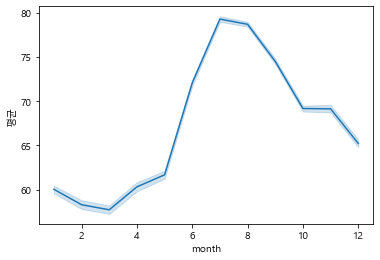

In [21]:
# 월별 습도 분석
sns.lineplot(x=train1['month'], y = train1['평균'])

모두가 알다시피 여름에 습도가 높고 겨울에 습도가 낮다    
그렇다면 월별 혈관질환빈도수는?

<AxesSubplot:xlabel='month', ylabel='frequency'>

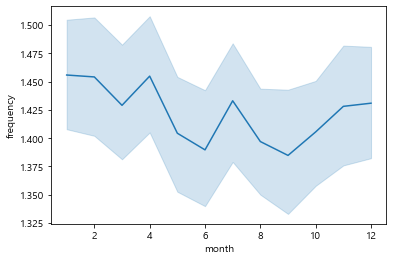

In [23]:
# 월별 혈관질환 빈도수
sns.lineplot(x = train1['month'], y=train1['frequency'])

음..

<AxesSubplot:xlabel='frequency', ylabel='평균'>

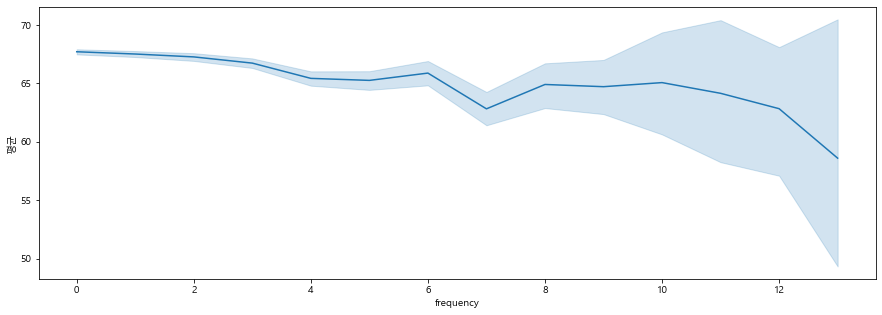

In [25]:
plt.rcParams['figure.figsize'] = (15,5)
sns.lineplot(x = train1['frequency'], y=train1['평균'])

빈도수가 높을수록 데이터수가 적어져 편차가 커진것 같다   
10회 이상 데이터는 제외시킨 뒤 다시 분석해보자

In [93]:
train1[train1['frequency']>]

,지역번호,sex,frequency,year,month,day,day_name,평균,최소,습도차
6,경북,1,6,2012,1,1,Sunday,58.400000,41.970000,16.430000
15,부산,2,6,2012,1,1,Sunday,51.000000,42.100000,8.900000
17,서울,2,6,2012,1,1,Sunday,65.000000,40.200000,24.800000
25,전남,2,6,2012,1,1,Sunday,63.000000,47.416667,15.583333
37,경기,2,6,2012,1,2,Monday,73.333333,53.033333,20.300000
...,...,...,...,...,...,...,...,...,...,...
49351,서울,2,9,2015,12,22,Tuesday,68.000000,41.800000,26.200000
49405,경기,2,6,2015,12,24,Thursday,75.000000,46.033333,28.966667
49418,서울,1,9,2015,12,24,Thursday,67.000000,47.100000,19.900000
49608,경기,1,6,2015,12,30,Wednesday,72.333333,42.366667,29.966667


In [94]:
index = train1[train1['frequency']>5].index

In [95]:
train_11 = train1.drop(index,axis =0)

<AxesSubplot:xlabel='frequency', ylabel='평균'>

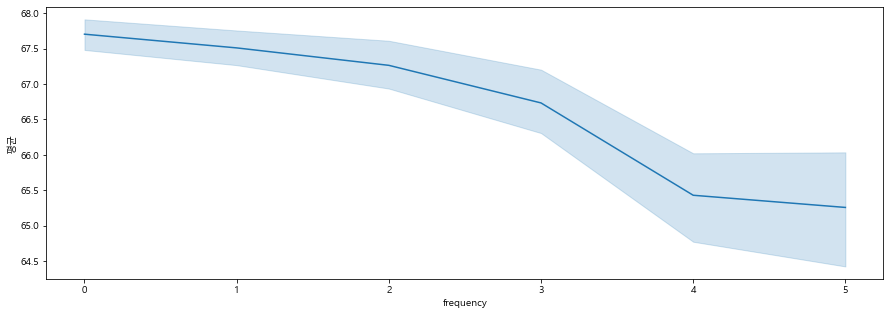

In [96]:
sns.lineplot(x = train_11['frequency'], y=train_11['평균'])

빈도수가 높은 1~5만 확인해봐도 혈관질환 발생 빈도수가 높을수록 평균습도는 낮아지는 경향을 확인할 수 있다

<AxesSubplot:xlabel='frequency', ylabel='습도차'>

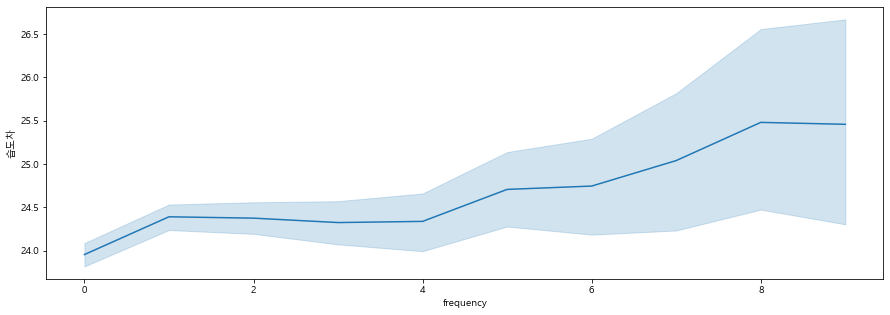

In [83]:
sns.lineplot(x = train_11['frequency'], y=train_11['습도차'])

<AxesSubplot:xlabel='frequency', ylabel='습도차'>

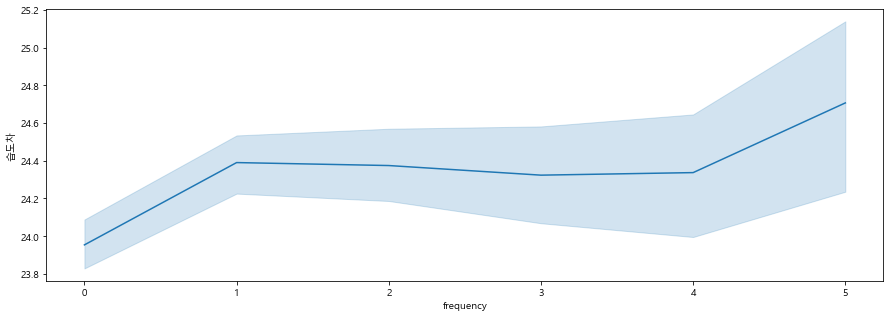

In [97]:
sns.lineplot(x = train_11['frequency'], y=train_11['습도차'])

또한 습도의 편차가 클수록 혈관질환 발생 빈도수도 높아지는것을 확인할 수 있다.

Text(0.5, 1.0, '습도 (강원영동지방 기준)')

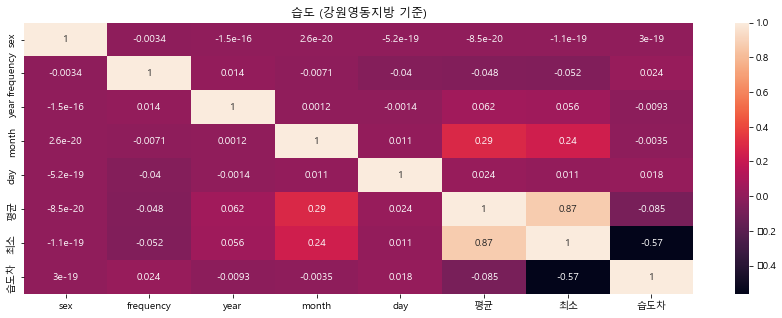

In [99]:
corr = train1.corr()
sns.heatmap(corr, annot = True)
plt.title('습도 (강원영동지방 기준)')

C:\Users\lmj\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, '습도 (강원영동지방 기준)')

C:\Users\lmj\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


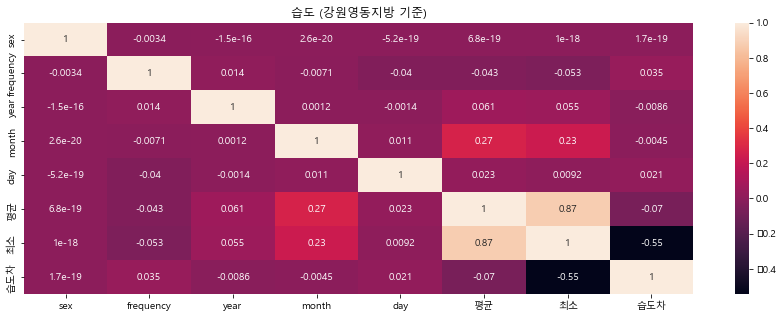

In [98]:
corr = train2.corr()
sns.heatmap(corr, annot = True)
plt.title('습도 (강원영동지방 기준)')

<AxesSubplot:xlabel='지역번호', ylabel='평균'>

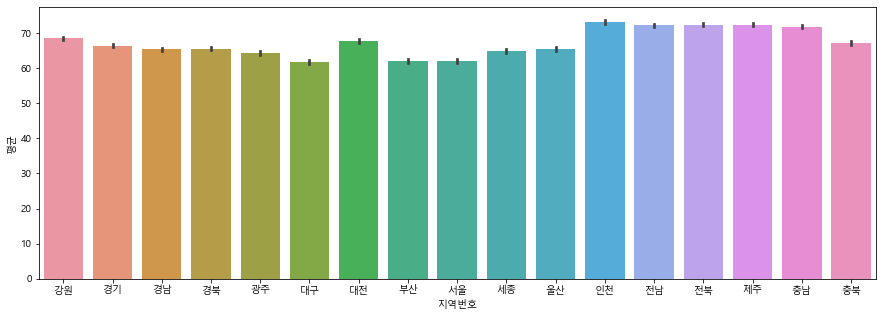

In [58]:
sns.barplot(x = train_11['지역번호'], y = train_11['평균'],)

<AxesSubplot:xlabel='day', ylabel='frequency'>

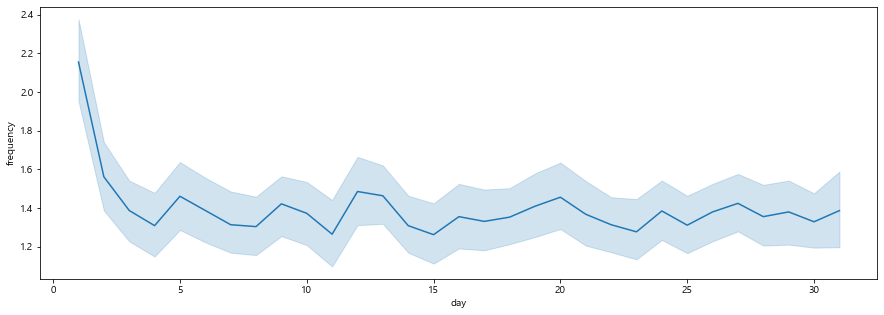

In [62]:
sns.lineplot(x=train_1['day'], y = train_1['frequency'])